<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (VII): Stellar Kinematics of 300,000 Stars in the Milky Way Galaxy__


In [2]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib . colors import LogNorm
import seaborn as sns
from scipy.stats import linregress
from astropy.table import Table
import astropy.units as u

In [3]:
# Introducing the Data
filename = "Gaia_bLT10_pGT5.fits"
gaia_data = Table.read(filename)
gaia_data.info()

<Table length=291961>
      name       dtype    unit                  description                    class    
--------------- ------- -------- ------------------------------------------ ------------
             ra float64      deg                            Right ascension       Column
            dec float64      deg                                Declination       Column
       parallax float64      mas                                   Parallax       Column
           pmra float64 mas / yr Proper motion in right ascension direction       Column
          pmdec float64 mas / yr     Proper motion in declination direction       Column
phot_g_mean_mag float32      mag                      G-band mean magnitude       Column
          bp_rp float32      mag                             BP - RP colour       Column
              l float64      deg                                                  Column
              b float64      deg                                                  Column

In [4]:
#display table
gaia_data[0:6]

ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,l,b,pml,pmb,star_type
deg,deg,mas,mas / yr,mas / yr,mag,mag,deg,deg,,,
float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,int64
217.39346574260355,-62.67618210292382,768.5003653333918,-3781.3059409680022,769.7656533486586,8.953612,3.796496,313.9259504647613,-1.9180507646395566,-3230.497046861122,2113.3843955045263,1
283.3304005276574,-9.47440329608491,384.102387014031,-8.289815797190247,49.93042324407943,18.340067,1.7707024,24.6938078577696,-4.719241190359943,40.99499224211043,29.875651096698007,3
101.28669244997666,-16.72080547130984,376.68011318544626,-459.67908354236243,-915.0229457593673,8.474459,-0.26138687,227.23437034896486,-8.892719959053593,631.6334546421347,-811.8773233877117,3
316.752931475456,38.75563452356051,286.1456653355467,4105.786342614827,3155.759205526986,5.4236755,1.6997027,82.33917547617432,-5.830265047983397,5119.741185484497,-935.4268004679991,1
316.7477375941723,38.763411107191175,285.9459145181478,4164.174053321776,3249.990814777406,4.716549,1.4449625,82.34225398268534,-5.822049275819512,5229.265308494422,-915.9420034212004,1
336.9923137243434,57.69406039042109,249.39262934847932,-725.2267060902635,-223.46056117209608,8.641353,2.6920462,104.68380362444273,-0.002964376373714358,-735.3460340654334,187.49562463581705,1


## Task 1:

### part (a): 

### 1) Distance (in parsecs):

$$
distance (pc) = {1000}​/{parallax (mas) }
$$

In [8]:
# Avoid division by zero or negative parallaxes (which are non-physical)
valid_parallax = gaia_data['parallax'] > 0
distance_pc = np.full(len(gaia_data), np.nan)  # Initialize with NaNs
distance_pc[valid_parallax] = 1000 / gaia_data['parallax'][valid_parallax]

# Add the column with a unit
gaia_data['distance_pc'] = distance_pc * u.pc  # Assign unit of parsecs
gaia_data[['distance_pc']][:6] 

distance_pc
pc
float64
1.3012355557777502
2.603472495377829
2.6547724846511405
3.494723566150677
3.4971648456146562
4.00974159746593


### 2) Absolute magnitude (MG):
$$ M_G​ = m_G​ − 5 log_{10}(​d) +5 $$

In [10]:
# Ensure we use valid distances (avoid NaNs and infinities)
valid_distance = np.isfinite(gaia_data['distance_pc']) & (gaia_data['distance_pc'] > 0)

# Initialize absolute magnitude with NaNs
MG = np.full(len(gaia_data), np.nan)

# Compute absolute magnitude where distances are valid
MG[valid_distance] = gaia_data['phot_g_mean_mag'][valid_distance] - 5 * np.log10(gaia_data['distance_pc'][valid_distance]) + 5

# Add the column with a unit
gaia_data['MG'] = MG * u.mag  # Assign unit of magnitudes
gaia_data[['MG']][0:6]

MG
mag
float64
13.381832719039723
21.262301940328243
11.354322155683963
7.7066113941306185
6.9979683991760036
10.62577072358281


### 3) Plotting __(CMD)__: 
#### Brightness vs Stellar temperature proxy:

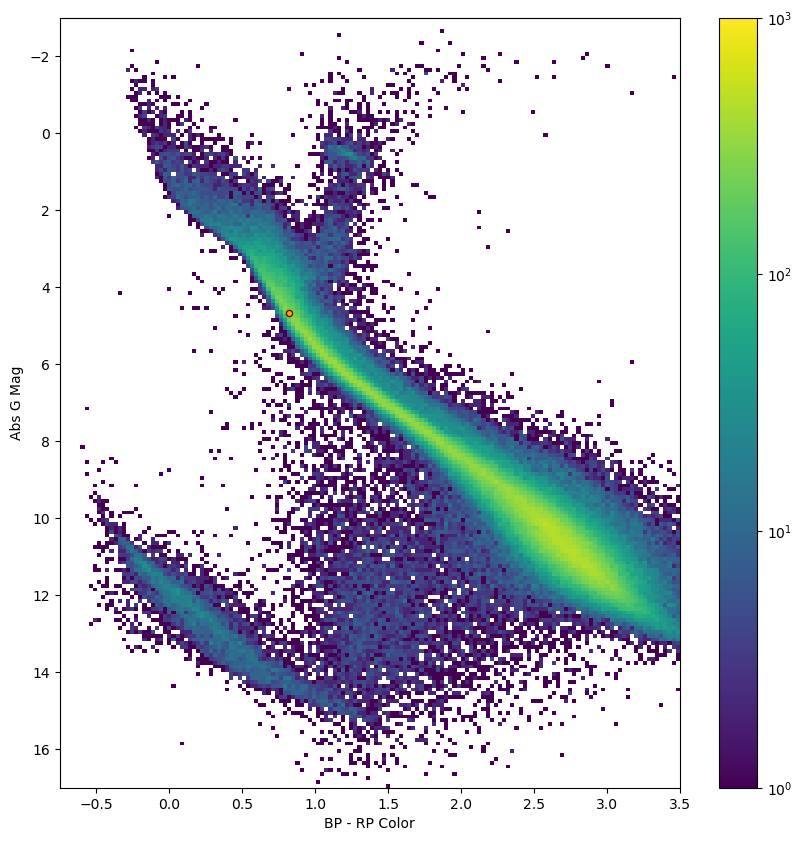

In [12]:
# Define bin edges for a 2D histogram in the color-magnitude diagram (CMD)
cmd_res = (np.linspace(-0.75, 3.5, 151), np.linspace(-3, 17, 201))

# Create a figure with specified size
fig = plt.figure(figsize=(10, 10))

# Add a subplot (single plot in this case)
ax = fig.add_subplot(111)

# Create a 2D histogram (color-magnitude diagram)
h = ax.hist2d(
    gaia_data['bp_rp'],  # X-axis: BP - RP color index (stellar temperature proxy)
    gaia_data['MG'],  # Y-axis: Absolute G-band magnitude (brightness)
    bins=cmd_res,  # Bin edges for histogram
    norm=LogNorm(1.0, 1e3)  # Logarithmic color scaling (for better contrast)
)

# Add a colorbar to indicate density of points
cb = fig.colorbar(h[3])
cb.ax.minorticks_off()  # Disable minor ticks on colorbar

# Invert the Y-axis since brighter magnitudes are lower values
ax.invert_yaxis()

# Set labels for axes
ax.set_xlabel('BP - RP Color')  # X-axis: Color index
ax.set_ylabel('Abs G Mag')  # Y-axis: Absolute magnitude

# Set Y-axis ticks at intervals of 2 magnitudes
ax.set_yticks(np.arange(-2, 18, 2))

# Highlight a specific point on the CMD (e.g., a reference star)
ax.scatter(
    0.82, 4.67,  # Coordinates (BP-RP color, Absolute magnitude)
    color='orange', edgecolor='#661100',  # Point color and edge color
    s=20,  # Point size
    lw=1  # Line width of edge
)

# Show the plot
plt.show()

## Task 2:

### 4) W velocity (km/s):
$$ W = 4.74 × \frac{μ_b}{1000} ​× d $$

In [15]:
# Initialize W velocity with NaNs to handle invalid data
W_velocity = np.full(len(gaia_data), np.nan)

# Apply formula only where distance is valid
valid = np.isfinite(gaia_data['distance_pc']) & np.isfinite(gaia_data['pmb'])

W_velocity[valid] = 4.74 * gaia_data['pmb'][valid] * gaia_data['distance_pc'][valid] /1000 

# Add the column with units
gaia_data['W_velocity'] = W_velocity * u.km / u.s
gaia_data[['W_velocity']][0:6]

W_velocity
km / s
float64
13.035051753483133
0.36867926622173164
-10.216357004658668
-15.495335318181064
-15.183168829435921
3.5635746858097432


### 4) (a) Plotting: 

- Main-Sequence $(MS)$ Stars: $ M_G​ > 4 $.
- Red Giant Branch $(RGB)$ Stars: $ M_G ​< 4 $.
- Blue Main-Sequence $(Blue\ MS)$ Stars: $ BP-RP < 0.5 $.

In [18]:
# Select valid W velocities (exclude NaNs)
valid_W = np.isfinite(gaia_data['W_velocity'])
# Define stellar samples
ms_stars = valid_W & (gaia_data['MG'] > 4)  # Main-sequence stars
rgb_stars = valid_W & (gaia_data['MG'] < 4)  # Red-giant branch stars
blue_ms_stars = valid_W & (gaia_data['bp_rp'] < 0.5)  # Blue MS stars

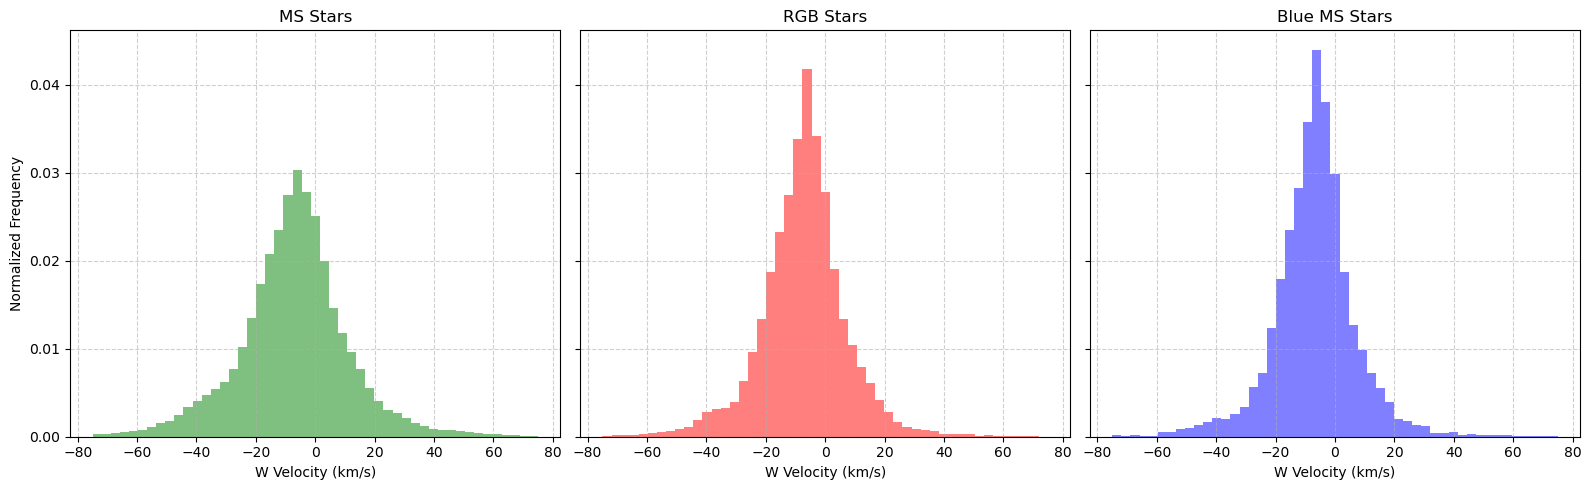

In [19]:
# Define star samples and labels
samples = [
    (ms_stars, 'MS Stars', 'green'),
    (rgb_stars, 'RGB Stars', 'red'),
    (blue_ms_stars, 'Blue MS Stars', 'blue')
]
# Define the W velocity range and number of bins
bins = np.linspace(-75, 75, 50)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

# Loop through each sample and plot
for ax, (stars, title, color) in zip(axes, samples):
    ax.hist(gaia_data['W_velocity'][stars], bins=bins, alpha=0.5, color=color, density=True)
    ax.set_title(title)
    ax.set_xlabel('W Velocity (km/s)')
    ax.grid(True, linestyle='--', alpha=0.6)

axes[0].set_ylabel('Normalized Frequency')  # Set y-label only on first subplot

plt.tight_layout()
plt.show()

### b) Sun’s W velocity & velocity dispersion of the stars:
$$ W_⊙​ = ⟨W⟩ $$
$$ σ_W​ = std(W)$$ 

### Using the Whole data:

In [22]:
# Filter valid W velocity values (remove NaNs)
valid_W = gaia_data['W_velocity'][np.isfinite(gaia_data['W_velocity'])]

# Compute the Sun’s W velocity (mean of W velocities)
W_sun = np.mean(valid_W)

# Compute the velocity dispersion (standard deviation)
W_dispersion = np.std(valid_W)

print(f"Sun's W velocity = {W_sun:.2f} km/s, Velocity Dispersion = {W_dispersion:.2f} km/s")

Sun's W velocity = -7.41 km/s, Velocity Dispersion = 19.92 km/s


### Using Samples: 

In [24]:
# Convert to Pandas DataFrame {To faciliate operations}
gaia_df = gaia_data.to_pandas()

# Compute statistics function
def compute_stats(data, label):
    mean_w = np.mean(data)
    std_w = np.std(data)
    print(f"{label}: Sun's W velocity = {mean_w:.2f} km/s, Velocity Dispersion = {std_w:.2f} km/s \n")

# Extract W velocities for each sample
ms_w = gaia_df.loc[ms_stars, 'W_velocity']
rgb_w = gaia_df.loc[rgb_stars, 'W_velocity']
blue_ms_w = gaia_df.loc[blue_ms_stars, 'W_velocity']

# Compute and print statistics
compute_stats(ms_w, "All MS Stars")
compute_stats(rgb_w, "Red-Giant Branch (RGB) Stars")
compute_stats(blue_ms_w, "Blue MS Stars")

All MS Stars: Sun's W velocity = -7.41 km/s, Velocity Dispersion = 20.17 km/s 

Red-Giant Branch (RGB) Stars: Sun's W velocity = -7.38 km/s, Velocity Dispersion = 15.02 km/s 

Blue MS Stars: Sun's W velocity = -7.05 km/s, Velocity Dispersion = 14.68 km/s 



In [25]:
# Hipparcos reference W velocity
W_hipparcos = 7.14  # using the refrence "Local stellar kinematics from HIPPARCOS data" 

# Function to compute relative error
def relative_error(measured, reference):
    return abs(abs(measured) - reference) / reference * 100 

# Compute relative errors
relative_error_whole = relative_error(W_sun, W_hipparcos)
relative_error_ms = relative_error(np.mean(ms_w), W_hipparcos)
relative_error_rgb = relative_error(np.mean(rgb_w), W_hipparcos)
relative_error_blue_ms = relative_error(np.mean(blue_ms_w), W_hipparcos)

# Print relative errors
print(f"Relative Error (Whole Sample) = {relative_error_whole:.2f}%")
print(f"Relative Error (All MS Stars) = {relative_error_ms:.2f}%")
print(f"Relative Error (RGB Stars) = {relative_error_rgb:.2f}%")
print(f"Relative Error (Blue-MS Stars) = {relative_error_blue_ms:.2f}%")

Relative Error (Whole Sample) = 3.78%
Relative Error (All MS Stars) = 3.81%
Relative Error (RGB Stars) = 3.37%
Relative Error (Blue-MS Stars) = 1.29%


In [26]:
#display the dataframe
gaia_df.head()

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,l,b,pml,pmb,star_type,distance_pc,MG,W_velocity
0,217.393466,-62.676182,768.500365,-3781.305941,769.765653,8.953612,3.796496,313.925950,-1.918051,-3230.497047,2113.384396,1,1.301236,13.381833,13.035052
1,283.330401,-9.474403,384.102387,-8.289816,49.930423,18.340067,1.770702,24.693808,-4.719241,40.994992,29.875651,3,2.603472,21.262302,0.368679
2,101.286692,-16.720805,376.680113,-459.679084,-915.022946,8.474459,-0.261387,227.234370,-8.892720,631.633455,-811.877323,3,2.654772,11.354322,-10.216357
3,316.752931,38.755635,286.145665,4105.786343,3155.759206,5.423676,1.699703,82.339175,-5.830265,5119.741185,-935.426800,1,3.494724,7.706611,-15.495335
4,316.747738,38.763411,285.945915,4164.174053,3249.990815,4.716549,1.444963,82.342254,-5.822049,5229.265308,-915.942003,1,3.497165,6.997968,-15.183169


In [27]:
gaia_df.describe(include='all')

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,l,b,pml,pmb,star_type,distance_pc,MG,W_velocity
count,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000,291961.000000
mean,189.780032,-0.378758,7.983826,-2.095607,-18.909869,14.723949,2.129245,180.183171,-0.060618,-3.251087,-12.300122,1.030014,144.274149,9.047011,-7.410125
std,98.712447,42.206794,5.175689,59.122081,57.547839,2.645034,0.809803,105.378788,5.754482,74.181405,39.489874,0.338118,40.859062,2.648915,19.924030
min,0.000219,-72.864986,5.000016,-3781.305941,-1981.228257,2.418525,-0.580014,0.000375,-9.999995,-3230.497047,-1429.958076,0.000000,1.301236,-2.646582,-288.563062
25%,102.157891,-39.792901,5.611894,-24.675841,-38.439578,13.139235,1.497421,87.225189,-5.065305,-33.188334,-25.696735,1.000000,117.077010,7.460513,-17.018476
50%,193.196299,-0.316803,6.570867,-2.318962,-14.207718,15.441213,2.378938,177.472423,-0.107163,-3.258879,-9.921961,1.000000,152.186919,9.765801,-6.850711
75%,281.843495,38.981572,8.541387,20.964406,6.628606,16.750437,2.753702,274.089417,4.905090,27.410490,3.715372,1.000000,178.192959,10.966234,2.410297
max,359.999445,72.835550,768.500365,4164.174053,3249.990815,20.038120,5.103951,359.999669,9.999967,5229.265308,2113.384396,3.000000,199.999355,21.262302,378.275311


---
# Discussion: Why Are the Values Different Across Samples?

### The differences in the Sun's WW velocity (vertical velocity relative to the Galactic plane) and the velocity dispersion across different stellar populations arise due to stellar evolution, age, and kinematic heating effects.

__Whole Sample vs. Specific Stellar Populations__:
* The whole sample includes a mix of stars from different evolutionary stages, leading to a broad velocity distribution and a higher overall velocity dispersion.
* Specific groups like the Main-Sequence (MS) stars, Red Giant Branch (RGB) stars, and Blue MS stars have distinct kinematic properties, leading to variations in velocity dispersion.

__Age and Galactic Heating__:

- Older stars have larger velocity dispersions because they have undergone more gravitational interactions with spiral arms, giant molecular clouds, and other stars. This process, known as dynamical heating, gradually increases the velocity dispersion of stars over time.
* Main-Sequence Stars (MS): This group includes stars of various ages, leading to a moderate dispersion (20.1720.17 km/s).
* Red Giant Branch (RGB) Stars: These stars are generally older than main-sequence stars, but they tend to have a slightly lower velocity dispersion (15.0215.02 km/s) compared to the total MS sample. This is likely because RGB stars originate from different MS populations with varying velocities.
* Blue MS Stars: These stars are generally younger, meaning they have had less time to be dynamically heated by interactions. As a result, their velocity dispersion is the lowest (14.6814.68 km/s).

## Refrences:
[1] W. Dehnen and J. J. Binney, “Local stellar kinematics from Hipparcos data,” Monthly Notices of the Royal Astronomical Society, vol. 298, no. 2, pp. 387–394, Aug. 1998, doi: https://doi.org/10.1046/j.1365-8711.1998.01600.x.